In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('50_startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isnull().values.any()

False

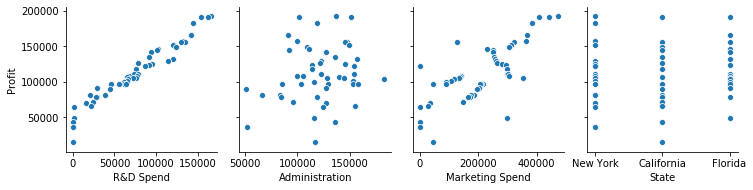

In [7]:
sns.pairplot(data=df, x_vars=['R&D Spend','Administration','Marketing Spend','State'], y_vars=["Profit"])

In [8]:
pd.set_option('display.float_format', lambda x : '%.2f' %x)

In [9]:
df[['R&D Spend','Administration','Marketing Spend','State','Profit']].describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.00,50.00,50.00,50.00
mean,73721.62,121344.64,211025.10,112012.64
std,45902.26,28017.80,122290.31,40306.18
min,0.00,51283.14,0.00,14681.40
25%,39936.37,103730.88,129300.13,90138.90
50%,73051.08,122699.79,212716.24,107978.19
75%,101602.80,144842.18,299469.08,139765.98
max,165349.20,182645.56,471784.10,192261.83


[0, 400000, 0, 190000]

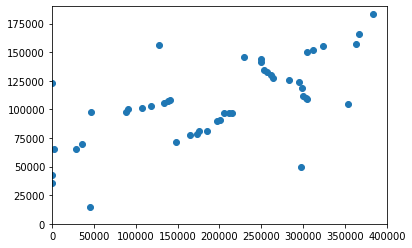

In [10]:
plt.scatter(df["Marketing Spend"], df["Profit"])
plt.axis([0, 400000, 0, 190000])

In [11]:
df2 = df[["Marketing Spend", "Profit"]]

In [12]:
df2.head()

,Marketing Spend,Profit
0,471784.10,192261.83
1,443898.53,191792.06
2,407934.54,191050.39
3,383199.62,182901.99
4,366168.42,166187.94


In [13]:
df2.describe()

,Marketing Spend,Profit
count,50.00,50.00
mean,211025.10,112012.64
std,122290.31,40306.18
min,0.00,14681.40
25%,129300.13,90138.90
50%,212716.24,107978.19
75%,299469.08,139765.98
max,471784.10,192261.83


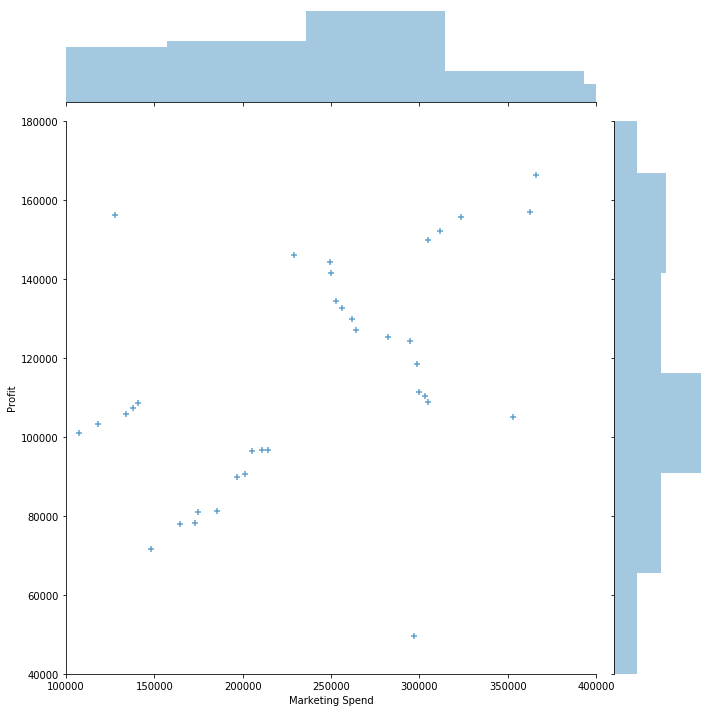

In [14]:
sns.jointplot('Marketing Spend', 'Profit', data = df2, xlim =(100000,400000), ylim = (40000,180000), height = 10, alpha = 0.7, marker = '+')

In [15]:
x = df2["Marketing Spend"]
y = df2["Profit"]
m = len(x) 

In [16]:
def h(x, a0, a1):                             # hypothesis
    h = a0 + a1*x
    return h
def J(a0, a1, x, y, m):                       
    j = 0
    for i in range (m):
        j += (h(x[i], a0, a1) - y[i]) ** 2
    return j/(2*m)
def gradJ(a0, a1, x, y, m):                    
    Dja0 = 0 
    Dja1 = 0
    for i in range (m):
        Dja0 += (h(x[i],a0,a1) - y[i])
        Dja1 += (h(x[i],a0,a1) - y[i]) * x[i]
    gradJ = [Dja0/m, Dja1/m]
    return gradJ
def ap1(a0, a1, gJ, alpha):                   
    a0p1 = a0 - alpha * gJ[0]
    a1p1 = a1 - alpha * gJ[1]
    ap1 = [a0p1, a1p1]
    return ap1

0.17300505590960158 0.1056556376980812


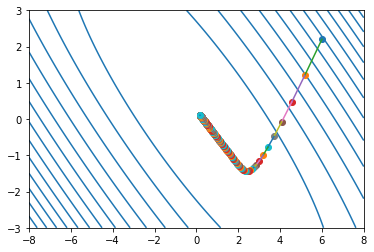

In [17]:
fig, ax = plt.subplots()
p0 = np.linspace(-8,8, 500)
p1 = np.linspace(-3,3, 500)
pa0, pa1 = np.meshgrid(p0, p1)      

ax.contour(pa0,pa1,J(pa0,pa1,x/190000,y/390000,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80,5)])

a0 = 6
a1 = 2.2
ax.plot(a0,a1, 'o')

for i in range(300):
    a0old, a1old = a0, a1
    a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x/190000,y/390000,m), alpha=0.1 )
    ax.plot(a0,a1,'o')
    ax.plot([a0old,a0],[a1old,a1], '-')
    
print(a0,a1)


In [18]:
x_mean = x.mean()
x_std = x.std()

y_mean = y.mean()
y_std = y.std()

x_new = (x - x_mean) / x_std           
y_new = (y - y_mean) / y_std

-3 4
-1.4999999999999993 2.4064052036533234
-0.7499999999999994 1.5936718575165183
-0.37499999999999967 1.1791778509867479
-0.18749999999999992 0.9677859076565649
-0.09375000000000003 0.8599760165581716
-0.04687500000000015 0.804992972097991
-0.023437500000000232 0.7769516194232989
-0.01171875000000021 0.762650529559206
-0.005859375000000179 0.7553569737285185
-0.002929687500000163 0.751637260254868


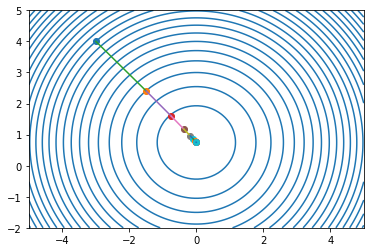

In [19]:
def plot_steps( startpt=[-3,4], alpha=0.5, nsteps=10) :    
    fig, ax = plt.subplots()
    p0 = np.linspace(-5,5, 100)
    p1 = np.linspace(-2,5, 100)
    pa0, pa1 = np.meshgrid(p0, p1)

   
    ax.contour(pa0,pa1,J(pa0,pa1,x_new,y_new,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80,.9)])

   
    a0 = startpt[0]; a1 = startpt[1]
    ax.plot(a0,a1, 'o')
    print(a0,a1)

   
    for i in range(nsteps):
        a0old, a1old = a0, a1
        a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x_new,y_new,m), alpha=alpha)
        print(a0,a1) 
        ax.plot(a0,a1,'o')
        ax.plot([a0old,a0],[a1old,a1], '-') 
        
plot_steps( startpt=[-3,4], alpha=0.5, nsteps=10)

In [20]:
a0,a1

(0.17300505590960158, 0.1056556376980812)

In [21]:
def plot_graph(x, y, a0, a1):
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o', label = "traning data")
    ax.plot(x, h(x_new, a0, a1), label = "h(x) = %.2f + %.2f * x" %(a0, a1))
    plt.legend()

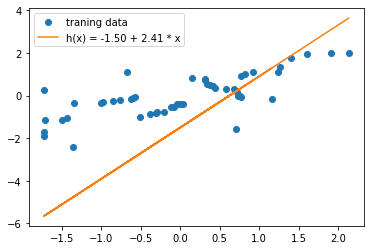

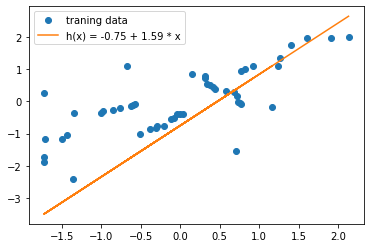

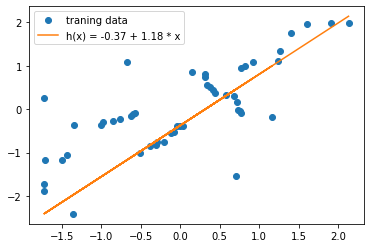

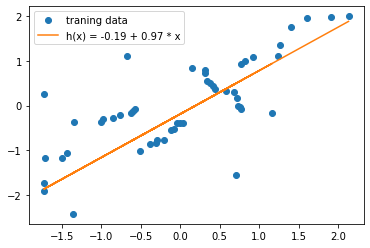

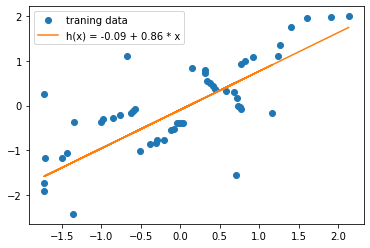

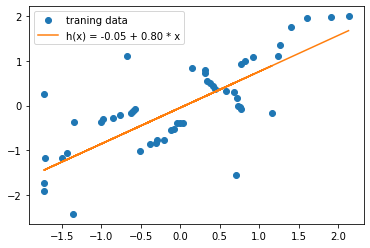

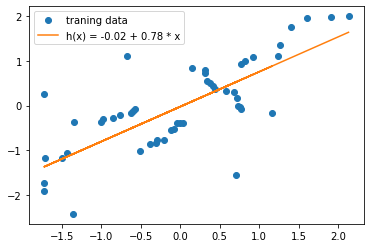

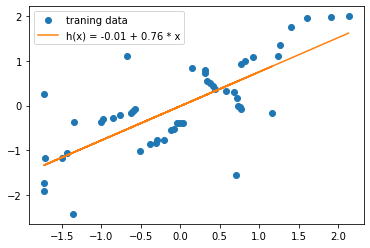

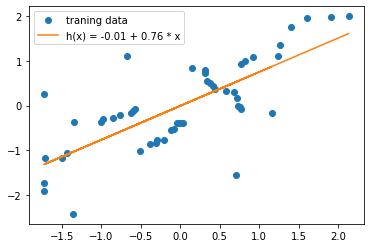

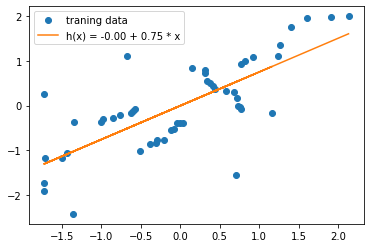

In [22]:
a0 = -3
a1 = 4
for i in range (10) :
    a0, a1 = ap1(a0, a1, gJ = gradJ(a0, a1, x_new, y_new, m), alpha = 0.5)
    plot_graph(x_new, y_new, a0, a1)

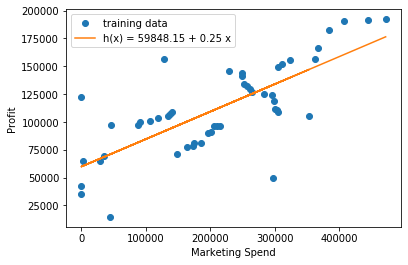

In [23]:
a0 = 0; a1 = 0.75
b1 = y_std/x_std * a1
b0 = y_std * a0 - b1*x_mean + y_mean

fig, ax = plt.subplots()
ax.plot(x,y, 'o', label='training data')
ax.plot(x, b0 + b1*x, label='h(x) = %.2f + %.2f x' %(b0, b1))
ax.set_xlabel('Marketing Spend')
ax.set_ylabel('Profit')
plt.legend();

In [24]:
def predict(x, a0, a1) :
    pre = y_std * (a0 + a1 * (x - x_mean)/x_std) + y_mean
    return pre

In [25]:
a0 = 0
a1 = 0.75
predict(362861.36, a0, a1)

149545.90571373812

In [26]:
a0 = 0
a1 = 0.75
predict(249744.55, a0, a1)

121583.9201155845

In [27]:
a0 = 0
a1 = 0.75
predict(303319.26, a0, a1)

134827.35643106455

In [28]:
a0 = 0
a1 = 0.75
predict(118148.2, a0, a1)

89053.8722520567

In [29]:
a0 = 0
a1 = 0.75
predict(174999.3, a0, a1)

103107.21798766566